In [5]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

from skimage import data, color

%matplotlib inline

# INTRODUCTION TO SKLEARN IMAGES

In [3]:
# Loading preset data
coffee_image = data.coffee()
coins_image = data.coins()

Coffee image shape: (400, 600, 3)
Coffee image size: 720000


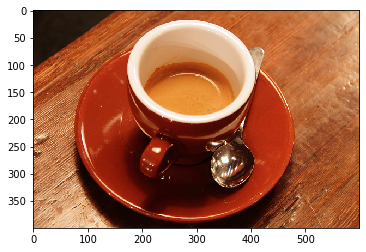

In [9]:
# Verify the shape and plot the images

# RGB image
plt.imshow(coffee_image)
print(f"Coffee image shape:",coffee_image.shape)
print(f"Coffee image size:",coffee_image.size)
plt.show()

Coins image shape: (303, 384)
Coins image size: 116352


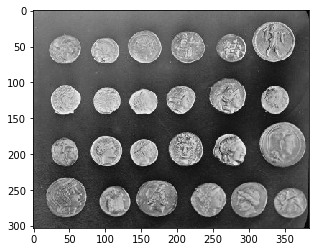

In [10]:
# Grayscale image
plt.imshow(coins_image, cmap="gray")
print(f"Coins image shape:",coins_image.shape)
print(f"Coins image size:",coins_image.size)
plt.show()

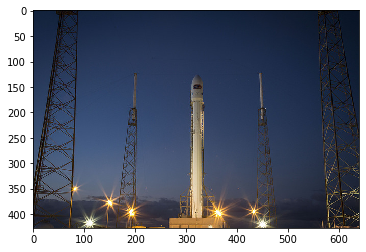

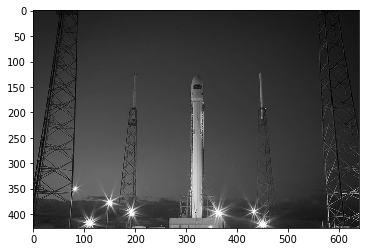

In [12]:
# RGB to gray

rocket = data.rocket()
plt.imshow(rocket)
plt.show()

# Convert the image to grayscale
gray_scaled_rocket = color.rgb2gray(rocket)
plt.imshow(gray_scaled_rocket, cmap="gray")
plt.show()

In [13]:
# Image type is a numpy array
print(type(coffee_image))

<class 'numpy.ndarray'>


# TREATING IMAGES WITH NUMPY

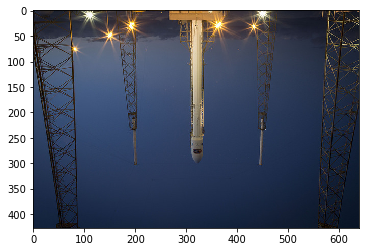

In [14]:
# Flip images vertically 
rocket_vertical_flip = np.flipud(rocket)
plt.imshow(rocket_vertical_flip, cmap="gray")
plt.show()

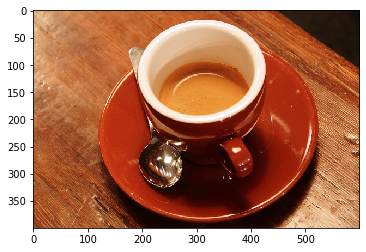

In [16]:
# Flip images horizontally 
coffee_horizontal_flip = np.fliplr(coffee_image)
plt.imshow(coffee_horizontal_flip, cmap="gray")
plt.show()

## Histograms

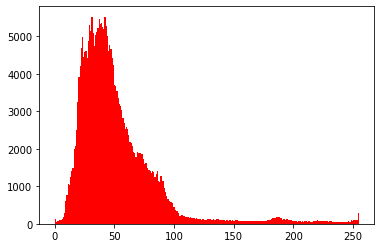

In [18]:
# Obtain the red channel
red_channel = rocket[:, :, 0]

# Plot the red histogram with bins in a range of 256
plt.hist(red_channel.ravel(), bins=256, color="red");
# OR
# plt.hist(red_channel.reshape(1, -1)[0], bins=256, color="red")

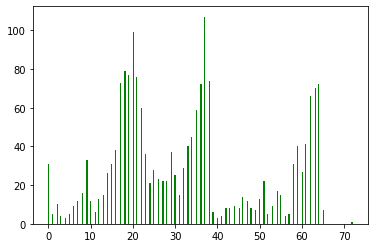

In [20]:
# Obtain the green channel
green_channel = rocket[0, :, :]

# Plot the red histogram with bins in a range of 256
plt.hist(green_channel.ravel(), bins = 256, color = "green");

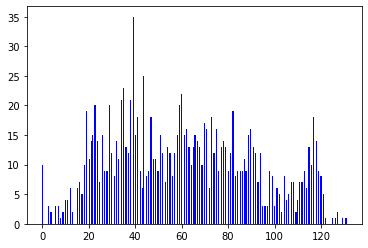

In [21]:
# Obtain the green channel
blue_channel = rocket[:, 0, :]

# Plot the red histogram with bins in a range of 256
plt.hist(blue_channel.ravel(), bins = 256, color = "blue");


## Tresholding

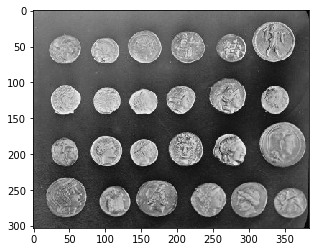

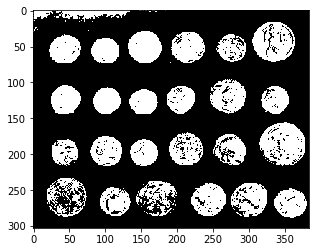

In [32]:
# Image in grayscale
image = coins_image

# Obtain the optimal threshold value
thresh = 127
# Apply thresholding to the image
binary = coins_image > thresh
# Show the original and thresholded
plt.imshow(coins_image, cmap="gray")
plt.show()

plt.imshow(binary, cmap="gray")
plt.show()

## Inverted tresholding

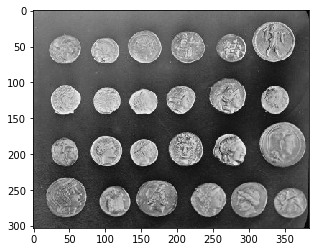

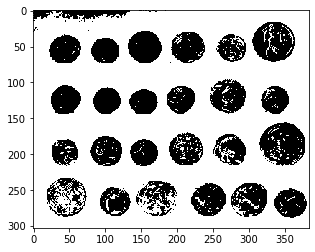

In [33]:
# Image in grayscale
image = coins_image

# Obtain the optimal threshold value
thresh = 127

# Apply thresholding to the image
binary = coins_image <= thresh

# Show the original and inverted thresholded
plt.imshow(coins_image, cmap="gray")
plt.show()

plt.imshow(binary, cmap="gray")
plt.show()

## Multiple tresholding

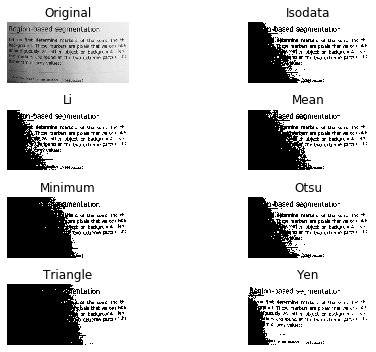

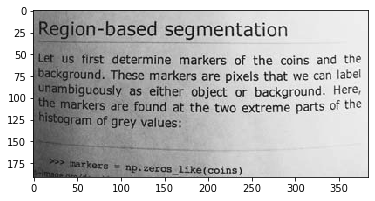

In [48]:
from skimage.filters import try_all_threshold

img = data.page()

# Obtain all the resulting images
fig, ax = try_all_threshold(img, verbose=False)

# Showing resulting plots
plt.show()

plt.imshow(img, cmap="gray")

## Global optimal tresh value

Tries to remove the bakckground of the image without affecting the items on it.

Works like the Fisher discriminant method.

The algorithm exhaustively searches for the threshold that minimizes the intra-class variance, defined as a weighted sum of variances of the two classes


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/34/Otsu%27s_Method_Visualization.gif/440px-Otsu%27s_Method_Visualization.gif">

https://en.wikipedia.org/wiki/Otsu%27s_method

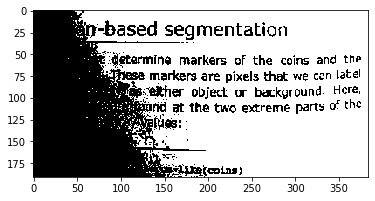

In [81]:
# Import the otsu threshold function
from skimage.filters import threshold_otsu

img = data.page()

# Obtain the optimal threshold value
thresh = threshold_otsu(img)

# Apply thresholding to the image
binary_global = img > thresh

plt.imshow(binary_global, cmap="gray")
plt.show()

# Local optimal tresh value

It works as an adaptative threshold, calcularing the threshold locally for each pixel in a neighborhood of **block_size** size.

https://docs.opencv.org/2.4/modules/imgproc/doc/miscellaneous_transformations.html?highlight=threshold#adaptivethreshold

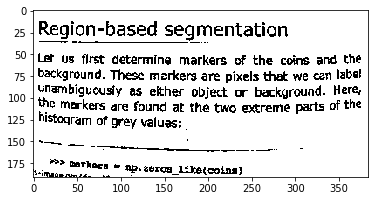

In [79]:
# Import the local threshold function
from skimage.filters import threshold_local
text_image = data.page()

# Set the block size to 55 - this number is set each 5. Ex 5, 15, 25, 105, 55, 2005 ... 
block_size = 55
# Obtain the optimal local thresholding
local_thresh = threshold_local(text_image, block_size, offset=12)
# Apply local thresholding and obtain the binary image
binary_local = text_image > local_thresh

plt.imshow(binary_local, cmap="gray")
plt.show()